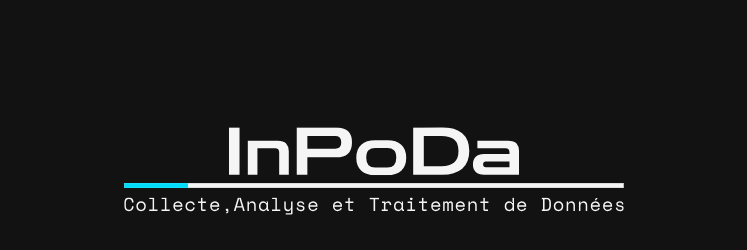

InPoDa est une nouvelle Plateforme qui permet l'analyse de données de résaux sociaux. Cette page se centre principalement sur Twitter. 

La plateforme offre plusieurs fonctionnalitées  :

    1)Propose un ensemble d'opérations de traitement de données

        → Permet l'identification de l’auteur d'une publication

In [7]:
import json
import Ajout_Auteur as Aa
with open("atterissage.json", 'r', encoding = 'utf-8') as file_json :
    jeu_tweet = file_json.readlines()

data = []
for ligne in jeu_tweet :
    tweet = json.loads(ligne)
    data.append(tweet)

print(data[3])
print(data[3]["Utilisateur"])

{'id': '1415291886860967940', 'AuthorLocation': '', 'CreatedAt': '20210714T124735Z', 'RetweetCount': '1', 'TweetLanguage': 'en', 'TweetText': 'RT @pacorjo According to a recent survey the American Insurance industry is currently spending 1 billion dollars more than it is bringin', 'Utilisateur': 67}
67


       → Extrait la liste de Mentions et d'Hashtags d'une publication :

In [8]:
import Liste_Hashtags as Lh
import Liste_Mentions as Lm

# LISTE HASHTAGS

print(Lm.liste_mentions("RT @sokoworlddotcom: We help our Customers use mobile devices or computers to Study online programs i.e degree or diploma or certificates w…"))

#LISTE MENTIONS

print (Lh.liste_hashtags("RT @VAIOT_LTD: Pioneers in #DeepLearning and #AI discuss Hybrid AI and the plans for the future of Artificial Intelligence. Very interestin…"))



['@sokoworlddotcom']
['#DeepLearning', '#AI']


         → Permet d'analyser le sentiment d'une publication en indiquant si il est positif ou négatif

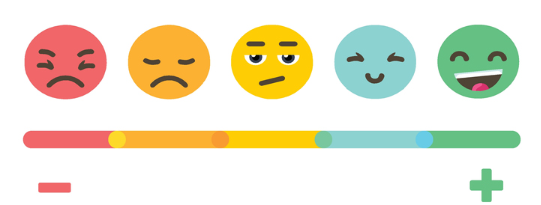

In [9]:
import Analyse_Des_Sentiments as As

print(As.analys_feeling("RT @VAIOT_LTD: Pioneers in #DeepLearning and #AI discuss Hybrid AI and the plans for the future of Artificial Intelligence. Very interestin…"))



-


         → Identification du/des topics de la publication

In [11]:
import Top_K_Topics
"""Affiche les Top_K_Topics"""


result = Top_K_Topics.topics(data[1]['TweetText'], num_topics=3)
sorted_data = sorted(result, key=lambda x: float(x.split('(')[-1].split(')')[0]), reverse=True)

# Affichage des résultats
print(sorted_data)

['hdatasystems (0.15)', 'hdatasystems (0.09)', 'sector (0.09)', 'rt (0.09)', 'artificial (0.09)', 'analytics (0.09)', 'intelligence (0.09)', 'financial (0.09)', 'augment (0.09)', 'artificia (0.09)', 'shaping (0.09)', 'httpstcomi3bohmgdh (0.09)', 'shaping (0.09)', 'augment (0.09)', 'artificia (0.09)', 'artificial (0.09)', 'rt (0.09)', 'intelligence (0.09)', 'hdatasystems (0.09)', 'financial (0.09)', 'artificia (0.09)', 'analytics (0.09)', 'intelligence (0.09)', 'augment (0.09)', 'rt (0.09)', 'sector (0.09)', 'artificial (0.09)', 'shaping (0.09)', 'analytics (0.08)', 'sector (0.08)']


    2) Propose également un ensemble d'opérations d'analyse de données
    
        → Permet l'accés au Top K hashtags/mentions/topics avec K un paramètre saisit par l'utilisateur :



In [ ]:
import Top_K_Mentions 

# TOP K MENTIONS


dictK_mentions = {} ## Initialisation d'un dictionnaire qui contiendra toutes les différentes mentions avec leur nombre d'occurences
for elt in liste_mention : ## On parcoure notre liste contenant toutes les mentions de chaque publication
    for m in elt : ## On parcoure les mentions unes à unes des publications
        if m not in dictK_mentions : ## On teste si la mention n'est pas déjà dans les clés du dictionnaire
            dictK_mentions[m] = 1 ## Si oui, alors on créer une nouvelle clé dans le dictionnaire et on initialise son occurence à 1
        else :
            dictK_mentions[m] += 1 ## Sinon, on ajoute +1 à l'occurence de la mention déjà existante

dictK_mentions = dict(sorted(dictK_mentions.items(), key = lambda item : item[1], reverse=True)) ## Trier le dictionnaire avec les mentions par ordre décroissant



In [ ]:
import Top_K_Topics

#TOP K TOPICS

all_results = []

""""(6) WhatsApp.html"for tweetdata in data:
    result = Top_K_Topics.topics(tweetdata['TweetText'], num_topics=3)
    all_results.append(result)"""


k = int(input("Donnes moi un nombre k afin que je t'affiche le top k des topics : "))
top_k_topics = Top_K_Topics.get_top_k_topics(all_results, k)

# Affichage des K meilleurs topics
for topic_name, count in top_k_topics:
    print(f"Topic: {topic_name}, Nombre de publications: {count}")

In [ ]:
import Top_K_Hashtags


        → Permet l'accès au nombre de publications par utilisateur/hashtags :

In [13]:
import Top_K_Utilisateurs
"""Affiche le nombre de publications pour tous les utilisateurs(100 en tout)"""

publications_utilisateur = Top_K_Utilisateurs.Publications_par_Utilisateurs(data)

# Afficher le nombre de publications pour tous les utilisateurs
print("Nombre de publications pour tous les utilisateurs:")
for i, (utilisateur, nombre_publications) in enumerate(publications_utilisateur.items(), 1):    #  Affichage des utilisateurs par nombre de publications de 1 à 101
    print(f"- {i}) Utilisateur {utilisateur} avec {nombre_publications} publications.")

Nombre de publications pour tous les utilisateurs:
- 1) Utilisateur 42 avec 21 publications.
- 2) Utilisateur 25 avec 20 publications.
- 3) Utilisateur 5 avec 22 publications.
- 4) Utilisateur 67 avec 22 publications.
- 5) Utilisateur 52 avec 19 publications.
- 6) Utilisateur 53 avec 18 publications.
- 7) Utilisateur 37 avec 15 publications.
- 8) Utilisateur 80 avec 15 publications.
- 9) Utilisateur 75 avec 17 publications.
- 10) Utilisateur 51 avec 23 publications.
- 11) Utilisateur 45 avec 15 publications.
- 12) Utilisateur 66 avec 25 publications.
- 13) Utilisateur 78 avec 14 publications.
- 14) Utilisateur 100 avec 15 publications.
- 15) Utilisateur 21 avec 16 publications.
- 16) Utilisateur 40 avec 17 publications.
- 17) Utilisateur 9 avec 15 publications.
- 18) Utilisateur 95 avec 19 publications.
- 19) Utilisateur 82 avec 18 publications.
- 20) Utilisateur 10 avec 16 publications.
- 21) Utilisateur 26 avec 13 publications.
- 22) Utilisateur 31 avec 15 publications.
- 23) Utilisa

In [14]:
import Liste_Utilisateur_Hashtag
"""Affiche les ulisateurs mentionnant un hashtag spécifique"""

hashtag_specifique = "AI"
utilisateurs_hashtag = Liste_Utilisateur_Hashtag.utilisateurs_mentionnant_hashtag(data, hashtag_specifique)   #  Récupère tous les utilisateurs mentionnant le hashtag spécifique

print(f"Utilisateurs mentionnant #{hashtag_specifique}:")   #  Affiche les utilisateurs mentionnant le hashtag spécifique
for utilisateur in utilisateurs_hashtag:
    print("-", utilisateur)

Utilisateurs mentionnant #AI:
- 52
- 25
- 51
- 53
- 21
- 100
- 84
- 74
- 71
- 98
- 99
- 48
- 59
- 8
- 69
- 6
- 98
- 76
- 55
- 83
- 5
- 43
- 39
- 89
- 71
- 1
- 55
- 4
- 92
- 12
- 20
- 82
- 69
- 70
- 57
- 22
- 81
- 52
- 86
- 10
- 63
- 93
- 73
- 12
- 64
- 66
- 14
- 44
- 77
- 95
- 88
- 51
- 86
- 67
- 26
- 89
- 38
- 94
- 13
- 31
- 96
- 22
- 67
- 26
- 1
- 63
- 57
- 68
- 72
- 10
- 3
- 66
- 9
- 94
- 53
- 72
- 0
- 4
- 89
- 40
- 6
- 95
- 4
- 27
- 82
- 97
- 77
- 95
- 13
- 39
- 95
- 37
- 12
- 58
- 49
- 98
- 13
- 89
- 13
- 47
- 82
- 84
- 55
- 20
- 25
- 94
- 61
- 52
- 55
- 34
- 12
- 3
- 47
- 39
- 7
- 54
- 7
- 84
- 74
- 19
- 20
- 69
- 74
- 80
- 42
- 20
- 38
- 67
- 20
- 19
- 43
- 26
- 68
- 79
- 36
- 2
- 83
- 60
- 83
- 93
- 48
- 28
- 36
- 68
- 16
- 89
- 36
- 94
- 6
- 14
- 62
- 31
- 69
- 28
- 73
- 24
- 80
- 13
- 100
- 91
- 12
- 34
- 94
- 5
- 95
- 2
- 79
- 87
- 29
- 86
- 58
- 76
- 79
- 63
- 73
- 35
- 6
- 34
- 16
- 20
- 63
- 10
- 90
- 65
- 48
- 49
- 53
- 75
- 83
- 39
- 1
- 20
- 22
- 76
- 100
- 41
- 52
- 8

        → Permet de voir l'ensemble de tweets d'un utilisateur spécifique ou mentionnant un utilisateur spécifique :

In [17]:
import TweetPrecis as Tp
"""Affiche les tweets d'un utilisateurs précis"""


utilisateur_cible = int(input("Donnes moi un nombre entre 0 et 100 pour l'utilisateur : "))

# Récupérer tous les tweets de l'utilisateur spécifié
tweets_de_utilisateur, erreur_message = Tp.Tweets_Utilisateur(data, utilisateur_cible)

# Afficher les tweets ou le message d'erreur
if not erreur_message:
    print(f"Tweets de l'utilisateur {utilisateur_cible}:")
    for tweet in tweets_de_utilisateur:
        print("-", tweet)
else:
    print(erreur_message)

Tweets de l'utilisateur 67:
- RT @pacorjo According to a recent survey the American Insurance industry is currently spending 1 billion dollars more than it is bringin
- RT @auxxc2 Google CEO Says Artificial Intelligence Will Be Mankinds Greatest Discovery httpstcoVX1am8MQLr
- RT @datanerd Microns cash deposits are generating millions of dollars in additional returns for the memorychip maker thanks to an artif
- This twitter search result is pure artificial intelligence
@ctoner @JasonAten httpstco0htyd5wVoy
- RT @akbarth3great #technology #psychology #ai #artificialintelligence #johnmccarthy Artificial Intelligence The Rise Of The (AI) https
- Textreading Artificial Intelligence will do your research for you httpstcoYsWdRYPOi3  #ai #ArtificialIntelligence #MachineLearning #DeepLearning #research httpstcoA9irP13V2q
- RT @digitalhealthxx Which Open Source Software (Keras Tensorflow or Pytorch) is the Best For Artificial Intelligence Development https
- RT @JoannaB19300468 @Artificialbra1n

In [18]:
import Liste_Utilisateur_Mention as Um
"""Affiche les tweets ou l'utilisateur donné est mentionné"""

# Nom d'utilisateur à rechercher dans les tweets
utilisateur_mentionne = "IainLJBrown"

tweetstag = Um.Tweets_Mentionnant_Utilisateur(data, utilisateur_mentionne)

print(f"Tweets mentionnant {utilisateur_mentionne}:")   # Affiche les tweets mentionnant l'utilisateur
for tweet in tweetstag:
    print("-", tweet)

Tweets mentionnant IainLJBrown:
- RT @IainLJBrown Artificial Intelligence (AI) Chips Market in Communications Equipment Industry  Technavio  KPVI News 6

Read more here
- RT @IainLJBrown Artificial Intelligence in Healthcare Intels AI tool screens patients for vision loss  The Financial Express

Read more
- RT @IainLJBrown UHV to offer new concentrations in cybersecurity artificial intelligence data science  Victoria Advocate

Read more her
- RT @IainLJBrown What are the benefits of Artificial Intelligence in Government  Entrepreneur

Read more here httpstcodXiIIHPFoU

#
- RT @machineml RT @iPythonistaBot RT @IainLJBrown The role of artificial intelligence in the fight against Covid19  SmartCitiesWorld
- RT @IainLJBrown Military researchers ask for artificial intelligence (AI) and machine learning able to share experiences  Military amp Aero
- RT @IainLJBrown Global Artificial IntelligenceMachine Learning Platforms Growth Opportunities  GlobeNewswire

Read more here httpst
- RT @IainLJ

        → Permet l'accès au utilisateurs mentionnant un hashtag spécifique ou bien mentionnés par un utilisateur spécifique :

In [19]:
import Liste_Utilisateur_Hashtag as Uh

hashtag_specifique = "AI"
utilisateurs_hashtag = Uh.utilisateurs_mentionnant_hashtag(data, hashtag_specifique)   #  Récupère tous les utilisateurs mentionnant le hashtag spécifique

print(f"Utilisateurs mentionnant #{hashtag_specifique}:")   #  Affiche les utilisateurs mentionnant le hashtag spécifique
for utilisateur in utilisateurs_hashtag:
    print("-", utilisateur)

Utilisateurs mentionnant #AI:
- 52
- 25
- 51
- 53
- 21
- 100
- 84
- 74
- 71
- 98
- 99
- 48
- 59
- 8
- 69
- 6
- 98
- 76
- 55
- 83
- 5
- 43
- 39
- 89
- 71
- 1
- 55
- 4
- 92
- 12
- 20
- 82
- 69
- 70
- 57
- 22
- 81
- 52
- 86
- 10
- 63
- 93
- 73
- 12
- 64
- 66
- 14
- 44
- 77
- 95
- 88
- 51
- 86
- 67
- 26
- 89
- 38
- 94
- 13
- 31
- 96
- 22
- 67
- 26
- 1
- 63
- 57
- 68
- 72
- 10
- 3
- 66
- 9
- 94
- 53
- 72
- 0
- 4
- 89
- 40
- 6
- 95
- 4
- 27
- 82
- 97
- 77
- 95
- 13
- 39
- 95
- 37
- 12
- 58
- 49
- 98
- 13
- 89
- 13
- 47
- 82
- 84
- 55
- 20
- 25
- 94
- 61
- 52
- 55
- 34
- 12
- 3
- 47
- 39
- 7
- 54
- 7
- 84
- 74
- 19
- 20
- 69
- 74
- 80
- 42
- 20
- 38
- 67
- 20
- 19
- 43
- 26
- 68
- 79
- 36
- 2
- 83
- 60
- 83
- 93
- 48
- 28
- 36
- 68
- 16
- 89
- 36
- 94
- 6
- 14
- 62
- 31
- 69
- 28
- 73
- 24
- 80
- 13
- 100
- 91
- 12
- 34
- 94
- 5
- 95
- 2
- 79
- 87
- 29
- 86
- 58
- 76
- 79
- 63
- 73
- 35
- 6
- 34
- 16
- 20
- 63
- 10
- 90
- 65
- 48
- 49
- 53
- 75
- 83
- 39
- 1
- 20
- 22
- 76
- 100
- 41
- 52
- 8

In [21]:
import Liste_Mention_Utilisateur as Um
"""Affiche les utilisateurs mentionnés par un utilisateur spécifique"""

# Utilisateur spécifique à rechercher dans les tweets
utilisateur_specifique = "IainLJBrown"

# Récupérer tous les utilisateurs mentionnés par l'utilisateur spécifique
utilisateurs_mentionnes = Um.utilisateurs_mentionnes_par_utilisateur(data, utilisateur_specifique)

# Afficher les utilisateurs mentionnés
print(f"Utilisateurs mentionnés par {utilisateur_specifique}:")
for utilisateur in utilisateurs_mentionnes:
    print("-", utilisateur)

Utilisateurs mentionnés par IainLJBrown:
- 0
- 1
- 2
- 3
- 4
- 5
- 7
- 8
- 9
- 11
- 13
- 14
- 15
- 18
- 20
- 21
- 22
- 23
- 25
- 27
- 28
- 31
- 32
- 33
- 34
- 35
- 36
- 37
- 39
- 41
- 45
- 47
- 49
- 50
- 51
- 52
- 53
- 54
- 55
- 56
- 57
- 58
- 59
- 64
- 65
- 67
- 69
- 70
- 71
- 75
- 76
- 79
- 82
- 83
- 86
- 87
- 88
- 89
- 90
- 91
- 93
- 94
- 95
- 96
- 98
- 99
